<a href="https://colab.research.google.com/github/andyndang/whylabs-notebooks/blob/main/Composite_Constraint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Table of Content
>[Installing WhyLabs Toolkit](#updateTitle=true&folderId=19NvqkwKTAE8OrGmHVSFFLJA6nBPxnPMk&scrollTo=JTgD-LhlWgPp)

>[Constraint setups](#updateTitle=true&folderId=19NvqkwKTAE8OrGmHVSFFLJA6nBPxnPMk&scrollTo=iCoU6VhrXnPL)

>>[Constraint specification](#updateTitle=true&folderId=19NvqkwKTAE8OrGmHVSFFLJA6nBPxnPMk&scrollTo=iCoU6VhrXnPL)

>>>[Simple Constraints](#updateTitle=true&folderId=19NvqkwKTAE8OrGmHVSFFLJA6nBPxnPMk&scrollTo=iCoU6VhrXnPL)

>>>[Composite Constraints](#updateTitle=true&folderId=19NvqkwKTAE8OrGmHVSFFLJA6nBPxnPMk&scrollTo=iCoU6VhrXnPL)

>[Composite analyzers](#updateTitle=true&folderId=19NvqkwKTAE8OrGmHVSFFLJA6nBPxnPMk&scrollTo=4FLewyqUVj1W)

>>[Conjuction Constraint](#updateTitle=true&folderId=19NvqkwKTAE8OrGmHVSFFLJA6nBPxnPMk&scrollTo=4FLewyqUVj1W)

>>[Disjunction Constraint](#updateTitle=true&folderId=19NvqkwKTAE8OrGmHVSFFLJA6nBPxnPMk&scrollTo=w_jCXsN7W9th)



# Installing WhyLabs Toolkit

[whylabs-toolkit](https://github.com/whylabs/whylabs-toolkit/) provides API helpers to interact with WhyLabs API, especially around the monitoring workflows. You'll first need to install it first

In [1]:
%pip install whylabs_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.2/402.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.3/547.3 kB 47.8 MB/s eta 0:00:00


In [11]:
import getpass

org_id = input("Your org ID: ")
api_key = getpass.getpass("Your API key: ")
resource_id = input("Your resource/dataset ID: ")

Your org ID: org-y7a3n9
Your API key: ··········
Your resource/dataset ID: model-23


In [12]:
import os
os.environ["ORG_ID"] = org_id
os.environ["WHYLABS_API_KEY"] = api_key
os.environ["DATASET_ID"] = resource_id

In [6]:
from whylabs_toolkit.monitor.models import *
from whylabs_toolkit.monitor import MonitorSetup
from whylabs_toolkit.monitor import MonitorManager

# Constraint setups

There are two types of constraints in WhyLabs: **simple constraints** and **composite constraints**.

## Constraint specification

### Simple Constraints

Currewntly we support static threshold constraints (with upper/lower bounds)

### Composite Constraints

We currently support **conjustion** (`&` or `AND` operator) and **disjunction** (`|` or `OR` operator) composite analyzers. You'll need to create the underlying simple constraints first to create these composite constraints

In [13]:
constraint_1="brightness-constraint"
constraint_2="entropy-constraint"

In [14]:
monitor_setup = MonitorSetup(monitor_id=constraint_1)
manager = MonitorManager(setup=monitor_setup)

# first you need to select the metric column
monitor_setup.set_target_columns(columns=["image.Brightness.mean"])
monitor_setup.config = FixedThresholdsConfig (
    # secondly, you'll need to select a "metric" within the column's distribution.
    # for single value profile, either "mean" or "median" will work equally well
    metric=SimpleColumnMetric.mean,
    # set the upper threshold
    upper=70,
)

monitor_setup.is_constraint = True # important for constraints
monitor_setup.disable_target_rollup = True # Must be enabled for individual profiles
monitor_setup.apply()
manager.save()


In [15]:
monitor_setup = MonitorSetup(monitor_id=constraint_2)
manager = MonitorManager(setup=monitor_setup)
monitor_setup.set_target_columns(columns=["image.entropy"])
monitor_setup.config = FixedThresholdsConfig (
    metric=SimpleColumnMetric.median,
    upper=8,
    lower=4,
)

monitor_setup.is_constraint = True # important for constraints
monitor_setup.disable_target_rollup = True # Must be enabled for individual profiles
monitor_setup.apply()
manager.save()


# Composite analyzers

After creating the underlying analyzers, you can now "compose" them.

## Conjuction Constraint

In [16]:
monitor_setup = MonitorSetup(monitor_id="composite-conjunction-monitor")
manager = MonitorManager(setup=monitor_setup)
# important: need to use a ConjunctionConfig here
# note that we need to append "-analyzer" suffixes here
monitor_setup.config = ConjunctionConfig(analyzerIds=[f"{constraint_1}-analyzer", f"{constraint_2}-analyzer"])
monitor_setup.is_constraint = True
monitor_setup.disable_target_rollup = True
monitor_setup.apply()
manager.save()


## Disjunction Constraint

In [17]:

monitor_setup = MonitorSetup(monitor_id="composite-disjunction-monitor")
manager = MonitorManager(setup=monitor_setup)
monitor_setup.config = DisjunctionConfig(analyzerIds=[f"{constraint_1}-analyzer", f"{constraint_2}-analyzer"])
monitor_setup.is_constraint = True
monitor_setup.disable_target_rollup = True
monitor_setup.apply()
manager.save()


# WhyLabs platform

The monitors should show up in the platform as four separate monitors

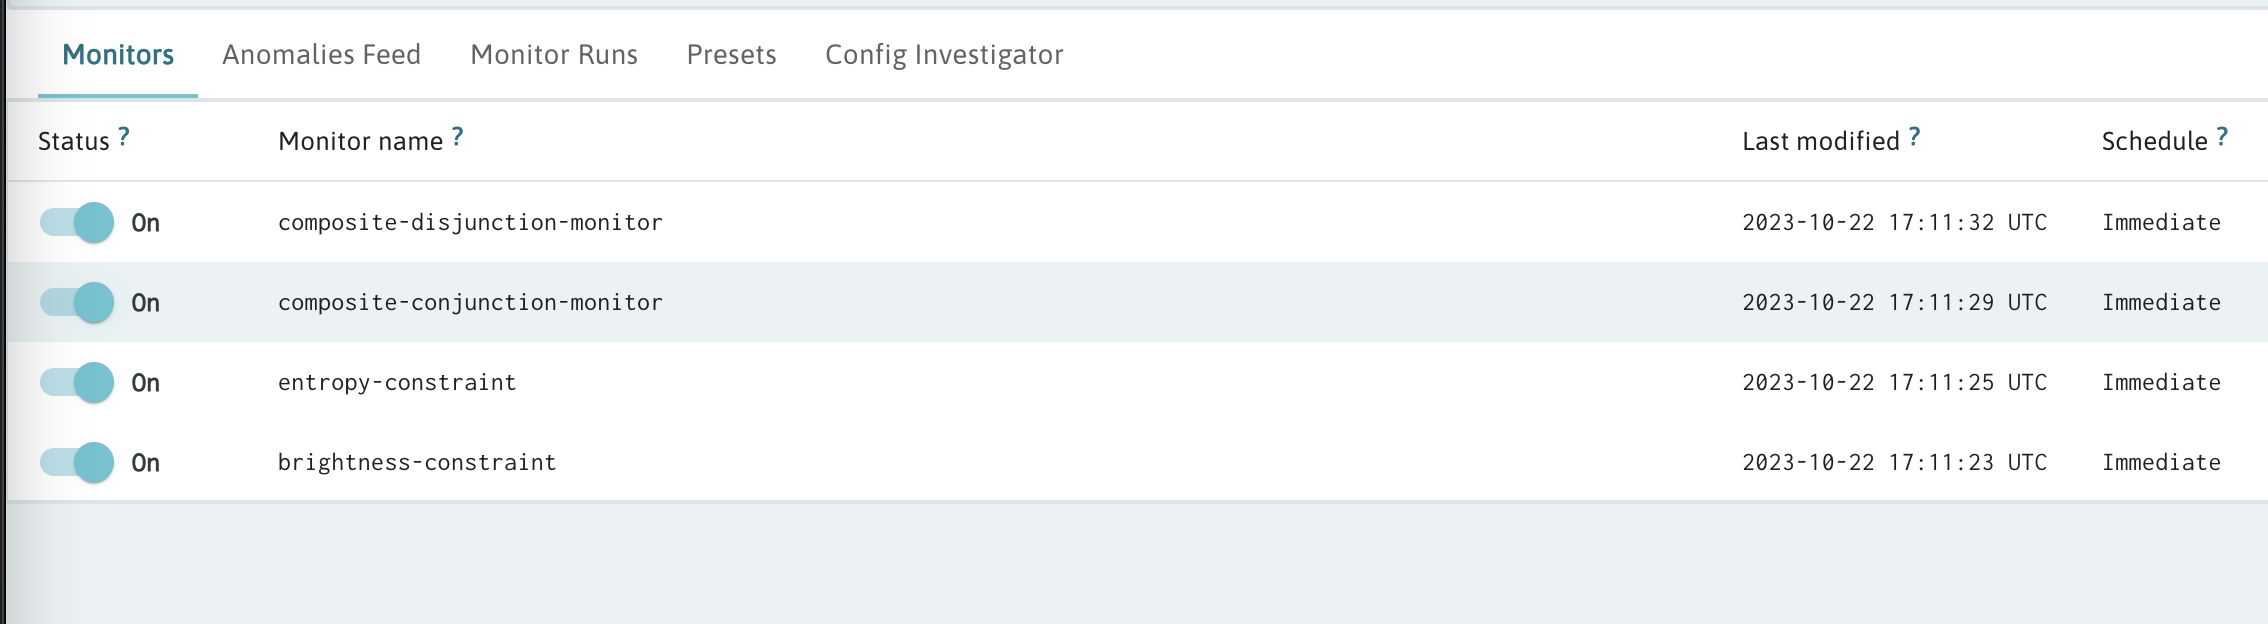